In [97]:
%run fit.py
#%run ebola4.py

In [98]:
%matplotlib inline
import seaborn as sns

ebola4(ebola2, llit_exponencial, c, k, sigma, mu, nu, spininicial, xg, yg, vxg, vyg, length)

In [94]:
mu = 0.015
sigma = 1.2
c = 1.8
k = 0.4
nu = 1
s0 = 2

In [100]:
cd ../Data/

/home/pau/Desktop/Fisidabo_Final/Codi/Fase3/Data


In [101]:
dades = [pd.read_csv(str(i)+"Cart.csv") for i in range(1,5)]
d1 = dades[0]
x01 = d1["x"][175]
y01 = d1["y"][175]
vx01 = d1["vx"][175]
vy01 = d1["vy"][175]

In [102]:
cd ../Ebola4

/home/pau/Desktop/Fisidabo_Final/Codi/Fase3/Ebola4


In [103]:
def dqq(a,b):
    #embed()
    a1 = a[:,0]
    a2 = a[:,1]
    b1 = b[:,0]
    b2 = b[:,1]
    return np.linalg.norm(a1-b1)**2 + np.linalg.norm(a2-b2)**2

In [104]:
#Perturbacions en les posicions inicials
delta_x_max = abs(0.05*x01)
delta_y_max = abs(0.05*y01)
delta_x = np.linspace(-delta_x_max,delta_x_max,11)
delta_y = np.linspace(-delta_y_max,delta_y_max,11)

In [105]:
from ebola4 import ebola4
x0 = ebola4(False, False, c, k, sigma, mu,nu,s0,x01,y01,vx01,vy01, 500)

In [111]:
delta_x_max

0.017347614592732347

In [106]:
from tqdm import tqdm_notebook as t
RES = np.zeros((11,11))
for i in t(range(11)):
    for j in range(11):
        dx = delta_x[i]
        dy = delta_y[j]
        x1 = ebola4(False, False, c, k, sigma, mu, nu,s0, x01+dx,y01+dy,vx01,vy01, 500)
        RES[i][j] = dqq(x0,x1)

HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

In [112]:
delta_x_max

0.017347614592732347

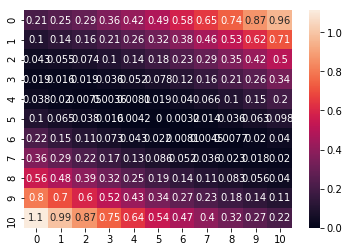

In [107]:
sns.heatmap(RES, annot = True)

In [108]:
#Perturbacions en les velocitats inicials
delta_vx_max = abs(0.05*vx01)
delta_vy_max = abs(0.05*vy01)
delta_vx = np.linspace(-delta_vx_max,delta_vx_max,11)
delta_vy = np.linspace(-delta_vy_max,delta_vy_max,11)

In [109]:
from tqdm import tqdm_notebook as t
RES2 = np.zeros((11,11))
for i in t(range(11)):
    for j in range(11):
        dvx = delta_vx[i]
        dvy = delta_vy[j]
        x1 = ebola4(False, False, c, k, sigma, mu, nu,s0, x01,y01,vx01+dvx,vy01+dvy, 500)
        RES2[i][j] = dqq(x0,x1)

HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

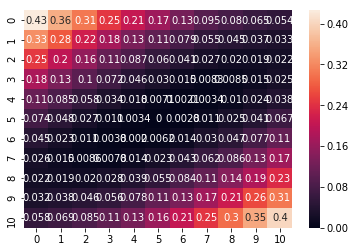

In [110]:
sns.heatmap(RES2, annot = True)